# Feature Testing
We iteratively remove one of the features, and note the testing accuracy to find out the most important features

In [1]:
import mysql.connector as mysql
import database as db
import csv, sys
import image_generator
import new_feature_extractor
import numpy as np
import os
import cv2
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as preprocessing
from sklearn import tree
from sklearn import metrics

Manually selected training and testing datasets

In [2]:
train_images = [3, 4, 8, 9, 12, 13, 14, 18, 23, 27, 28, 29, 30, 35, 37, 40, 44, 46, 48, 49, 53, 55, 56, 61, 62, 64, 67, 73, 75, 79, 80, 85, 91, 94, 97, 1, 2, 5, 7, 11, 16, 17, 21, 22, 25, 32, 33, 41, 42, 47, 58, 59, 63, 65, 68, 71, 74, 76, 77, 78, 81, 83, 84, 86, 88, 90, 93, 96, 100, 105]
test_images = [128, 130, 133, 143, 147, 149, 153, 157, 158, 161, 168, 174, 178, 208, 211, 127, 131, 134, 135, 137, 138, 146, 148, 151, 160, 165, 166, 169, 196, 201]

In [3]:
data = pd.read_csv("feature_values_normalized.csv") #My generated file with normalized and scaled values
data.head()

,filename,Mobilenet_v1,Inception_v4,Resnet_v1_152,kp_surf,average_perceived_brightness,contrast,area_by_perim,aspect_ratio,edge_length1,hue1
0,ILSVRC2012_val_00000001.JPEG,1,0,0,0.205671,0.055078,-0.444094,-0.418116,0.517548,-0.611463,-0.369982
1,ILSVRC2012_val_00000002.JPEG,0,0,0,0.221067,-0.291442,-0.397891,-0.462964,-0.060948,-0.595736,-0.508507
2,ILSVRC2012_val_00000003.JPEG,1,0,0,0.066978,-0.082052,-0.066837,0.321428,-0.076903,0.702114,0.110392
3,ILSVRC2012_val_00000004.JPEG,1,0,0,-0.267721,0.935766,0.359978,0.874717,0.489210,1.549822,0.800613
4,ILSVRC2012_val_00000005.JPEG,0,1,0,0.219072,-0.368258,-0.376495,-0.283553,-0.299015,-0.475347,-0.364204


In [4]:
temp = [x-1 for x in train_images]
train = data.iloc[temp]
temp = [x-1 for x in test_images]
test = data.iloc[temp]

In [5]:
X_train = train.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
X_test = test.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
Y_train = train[['Mobilenet_v1']]
Y_test = test[['Mobilenet_v1']]

In [6]:
features = list(X_train.columns)
dt_accs = {}
lr_accs = {}

In [7]:
for x in features:
    train = X_train.drop([x], axis = 1)
    test = X_test.drop([x], axis = 1)
    tree_model = DecisionTreeClassifier()
    tree_model.fit(train, Y_train)
    log_reg_model = LogisticRegression()
    log_reg_model.fit(train, Y_train)
    dt_accs[x] = tree_model.score(test, Y_test)*100
    lr_accs[x] = log_reg_model.score(test, Y_test)*100

In [8]:
dt_accs

{'kp_surf': 50.0,
 'average_perceived_brightness': 56.666666666666664,
 'contrast': 66.66666666666666,
 'area_by_perim': 50.0,
 'aspect_ratio': 53.333333333333336,
 'edge_length1': 53.333333333333336,
 'hue1': 60.0}

In [9]:
lr_accs

{'kp_surf': 83.33333333333334,
 'average_perceived_brightness': 83.33333333333334,
 'contrast': 83.33333333333334,
 'area_by_perim': 83.33333333333334,
 'aspect_ratio': 83.33333333333334,
 'edge_length1': 83.33333333333334,
 'hue1': 83.33333333333334}

In [10]:
tree_model.tree_.max_depth

7

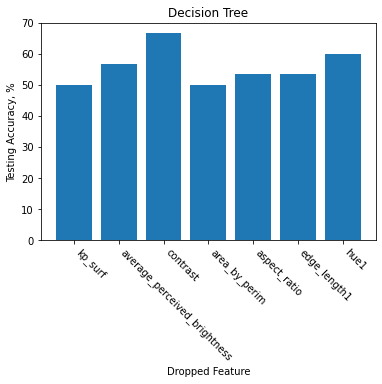

In [11]:
plt.bar(range(len(dt_accs)), list(dt_accs.values()), align='center')
plt.xticks(range(len(dt_accs)), list(dt_accs.keys()))
plt.xticks(rotation=-45, ha='left')
plt.title('Decision Tree')
plt.ylabel('Testing Accuracy, %')
plt.xlabel('Dropped Feature')
plt.show()

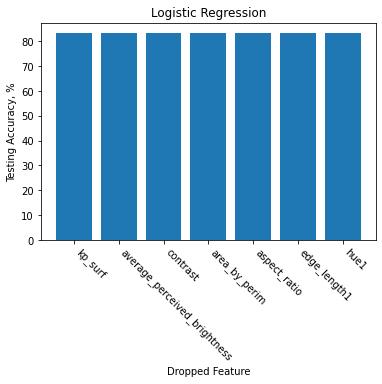

In [12]:
plt.bar(range(len(lr_accs)), list(lr_accs.values()), align='center')
plt.xticks(range(len(lr_accs)), list(lr_accs.keys()))
plt.xticks(rotation=-45, ha='left')
plt.title('Logistic Regression')
plt.ylabel('Testing Accuracy, %')
plt.xlabel('Dropped Feature')
plt.show()

Now we drop every feature, except one, and repeat tests

In [13]:
dt_accs = {}
lr_accs = {}
for x in features:
    train = X_train[[x]]
    test = X_test[[x]]
    tree_model = DecisionTreeClassifier()
    tree_model.fit(train, Y_train)
    log_reg_model = LogisticRegression()
    log_reg_model.fit(train, Y_train)
    dt_accs[x] = tree_model.score(test, Y_test)*100
    lr_accs[x] = log_reg_model.score(test, Y_test)*100

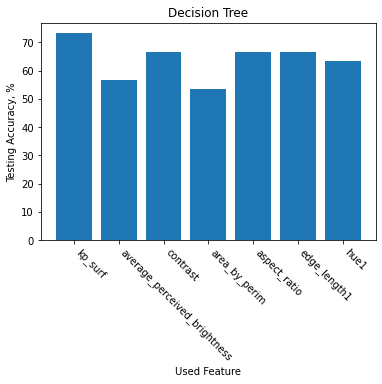

In [14]:
plt.bar(range(len(dt_accs)), list(dt_accs.values()), align='center')
plt.xticks(range(len(dt_accs)), list(dt_accs.keys()))
plt.xticks(rotation=-45, ha='left')
plt.title('Decision Tree')
plt.ylabel('Testing Accuracy, %')
plt.xlabel('Used Feature')
plt.show()

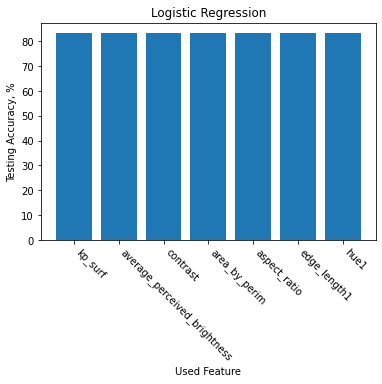

In [15]:
plt.bar(range(len(lr_accs)), list(lr_accs.values()), align='center')
plt.xticks(range(len(lr_accs)), list(lr_accs.keys()))
plt.xticks(rotation=-45, ha='left')
plt.title('Logistic Regression')
plt.ylabel('Testing Accuracy, %')
plt.xlabel('Used Feature')
plt.show()

In [16]:
 dt_accs

{'kp_surf': 73.33333333333333,
 'average_perceived_brightness': 56.666666666666664,
 'contrast': 66.66666666666666,
 'area_by_perim': 53.333333333333336,
 'aspect_ratio': 66.66666666666666,
 'edge_length1': 66.66666666666666,
 'hue1': 63.33333333333333}

In [17]:
lr_accs

{'kp_surf': 83.33333333333334,
 'average_perceived_brightness': 83.33333333333334,
 'contrast': 83.33333333333334,
 'area_by_perim': 83.33333333333334,
 'aspect_ratio': 83.33333333333334,
 'edge_length1': 83.33333333333334,
 'hue1': 83.33333333333334}

In [18]:
dt_accs = {}
lr_accs = {}
train = X_train[['average_perceived_brightness', 'kp_surf']]
test = X_test[['average_perceived_brightness', 'kp_surf']]
tree_model = DecisionTreeClassifier()
tree_model.fit(train, Y_train)
log_reg_model = LogisticRegression()
log_reg_model.fit(train, Y_train)
print('Testing accuracy of the Decision Tree:', tree_model.score(test, Y_test)*100)
print('Testing accuracy of the Logistic Regression:', log_reg_model.score(test, Y_test)*100)

Testing accuracy of the Decision Tree: 63.33333333333333
Testing accuracy of the Logistic Regression: 83.33333333333334


In [19]:
train = X_train.drop(['contrast'], axis = 1)
test = X_test.drop(['contrast'], axis = 1)
tree_model = DecisionTreeClassifier()
tree_model.fit(train, Y_train)
log_reg_model = LogisticRegression()
log_reg_model.fit(train, Y_train)
print(tree_model.score(test, Y_test)*100)
print(log_reg_model.score(test, Y_test)*100)

66.66666666666666
83.33333333333334


# Diffreent Dataset
Here we use another dataset. Instead of manually chosen easy and difficult images, we pick images with the largest feature values (e.g. max number of keypoints, highest brightness, etc.). Choosing 15 samples for each feature results in a dataset with 105 images.

In [20]:
dset = data.iloc[[1921,2732,217,519,745,2941,2622,1693,1987,739,2765,3585,997,1616,596,3063,2710,4383,3570,2247,650,2852,2974,1733,265,2532,84,117,4453,450,2848,283,256,1297,4302,4980,685,2180,2031,557,1494,2368,1779,2144,358,2208,596,1053,4421,2941,4386,4689,217,519,1815,2419,997,1616,1631,1584,493,4856,1826,1294,1766,1322,4540,2036,1097,2256,3427,1681,1526,1963,2566,2208,1815,2941,4386,1778,2765,2148,3507,732,1053,3540,4421,1616,1584,3878,295,3466,316,4607,1419,428,125,3249,33,2450,1027,3155,2735,2693,1659]]
X = dset.drop(['Mobilenet_v1', 'Inception_v4', 'Resnet_v1_152', 'filename'], axis = 1)
y = dset[['Mobilenet_v1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

First of all, we test it without removing any features

In [21]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
print('Testing accuracy of the Decision Tree:', tree_model.score(X_test, y_test)*100)
print('Testing accuracy of the Logistic Regression:', log_reg_model.score(X_test, y_test)*100)

Testing accuracy of the Decision Tree: 77.14285714285715
Testing accuracy of the Logistic Regression: 77.14285714285715


In [22]:
dt_accs = {}
lr_accs = {}
for x in features:
    train = X_train.drop([x], axis = 1)
    test = X_test.drop([x], axis = 1)
    tree_model = DecisionTreeClassifier()
    tree_model.fit(train, y_train)
    log_reg_model = LogisticRegression()
    log_reg_model.fit(train, y_train)
    dt_accs[x] = tree_model.score(test, y_test)*100
    lr_accs[x] = log_reg_model.score(test, y_test)*100

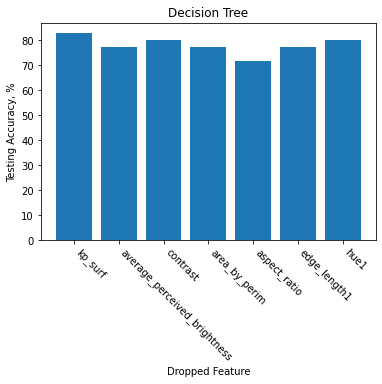

In [23]:
plt.bar(range(len(dt_accs)), list(dt_accs.values()), align='center')
plt.xticks(range(len(dt_accs)), list(dt_accs.keys()))
plt.xticks(rotation=-45, ha='left')
plt.title('Decision Tree')
plt.ylabel('Testing Accuracy, %')
plt.xlabel('Dropped Feature')
plt.show()    

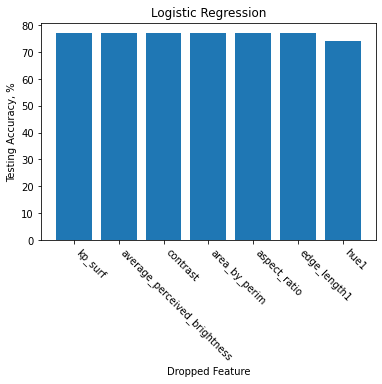

In [24]:
plt.bar(range(len(lr_accs)), list(lr_accs.values()), align='center')
plt.xticks(range(len(lr_accs)), list(lr_accs.keys()))
plt.xticks(rotation=-45, ha='left')
plt.title('Logistic Regression')
plt.ylabel('Testing Accuracy, %')
plt.xlabel('Dropped Feature')
plt.show()

In [25]:
dt_accs

{'kp_surf': 82.85714285714286,
 'average_perceived_brightness': 77.14285714285715,
 'contrast': 80.0,
 'area_by_perim': 77.14285714285715,
 'aspect_ratio': 71.42857142857143,
 'edge_length1': 77.14285714285715,
 'hue1': 80.0}

In [26]:
lr_accs

{'kp_surf': 77.14285714285715,
 'average_perceived_brightness': 77.14285714285715,
 'contrast': 77.14285714285715,
 'area_by_perim': 77.14285714285715,
 'aspect_ratio': 77.14285714285715,
 'edge_length1': 77.14285714285715,
 'hue1': 74.28571428571429}

In [27]:
dt_accs = {}
lr_accs = {}
for x in features:
    train = X_train[[x]]
    test = X_test[[x]]
    tree_model = DecisionTreeClassifier()
    tree_model.fit(train, y_train)
    log_reg_model = LogisticRegression()
    log_reg_model.fit(train, y_train)
    dt_accs[x] = tree_model.score(test, y_test)*100
    lr_accs[x] = log_reg_model.score(test, y_test)*100

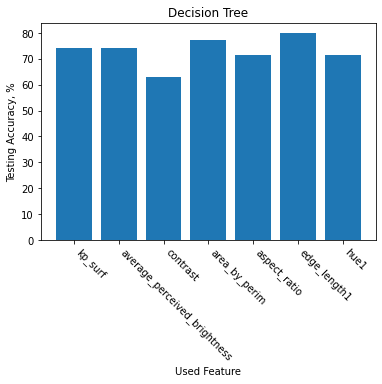

In [28]:
plt.bar(range(len(dt_accs)), list(dt_accs.values()), align='center')
plt.xticks(range(len(dt_accs)), list(dt_accs.keys()))
plt.xticks(rotation=-45, ha='left')
plt.title('Decision Tree')
plt.ylabel('Testing Accuracy, %')
plt.xlabel('Used Feature')
plt.show()

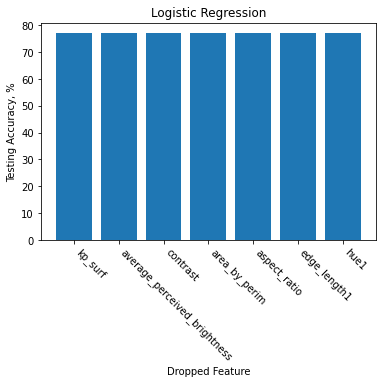

In [29]:
plt.bar(range(len(lr_accs)), list(lr_accs.values()), align='center')
plt.xticks(range(len(lr_accs)), list(lr_accs.keys()))
plt.xticks(rotation=-45, ha='left')
plt.title('Logistic Regression')
plt.ylabel('Testing Accuracy, %')
plt.xlabel('Dropped Feature')
plt.show()

Decision Tree shows the best accuracy when kp_surf is not included, so we choose this model for now

In [30]:
train = X_train.drop(['kp_surf'], axis = 1)
test = X_test.drop(['kp_surf'], axis = 1)
tree_model = DecisionTreeClassifier()
tree_model.fit(train, y_train)
prediction = tree_model.predict(test)
print("Mobilenet predicted in {}% of the cases\nOther models are predicted in {}% of the cases".format(list(prediction).count(1)/len(prediction)*100, list(prediction).count(0)/len(prediction)*100))

Mobilenet predicted in 80.0% of the cases
Other models are predicted in 20.0% of the cases


[Text(558.0, 1041.9, 'edge_length1 <= -0.623\ngini = 0.382\nsamples = 70\nvalue = [18, 52]'),
 Text(418.5, 951.3000000000001, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(697.5, 951.3000000000001, 'aspect_ratio <= -0.404\ngini = 0.334\nsamples = 66\nvalue = [14, 52]'),
 Text(279.0, 860.7, 'average_perceived_brightness <= -0.494\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(139.5, 770.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(418.5, 770.1, 'edge_length1 <= -0.15\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(279.0, 679.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(558.0, 679.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(1116.0, 860.7, 'edge_length1 <= 0.473\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(976.5, 770.1, 'area_by_perim <= 0.334\ngini = 0.381\nsamples = 39\nvalue = [10, 29]'),
 Text(837.0, 679.5, 'average_perceived_brightness <= -0.486\ngini = 0.284\nsamples = 35\nvalue = [6, 29]'),
 Text(697.5, 588.9, 'gini = 0.0\nsamples = 1\

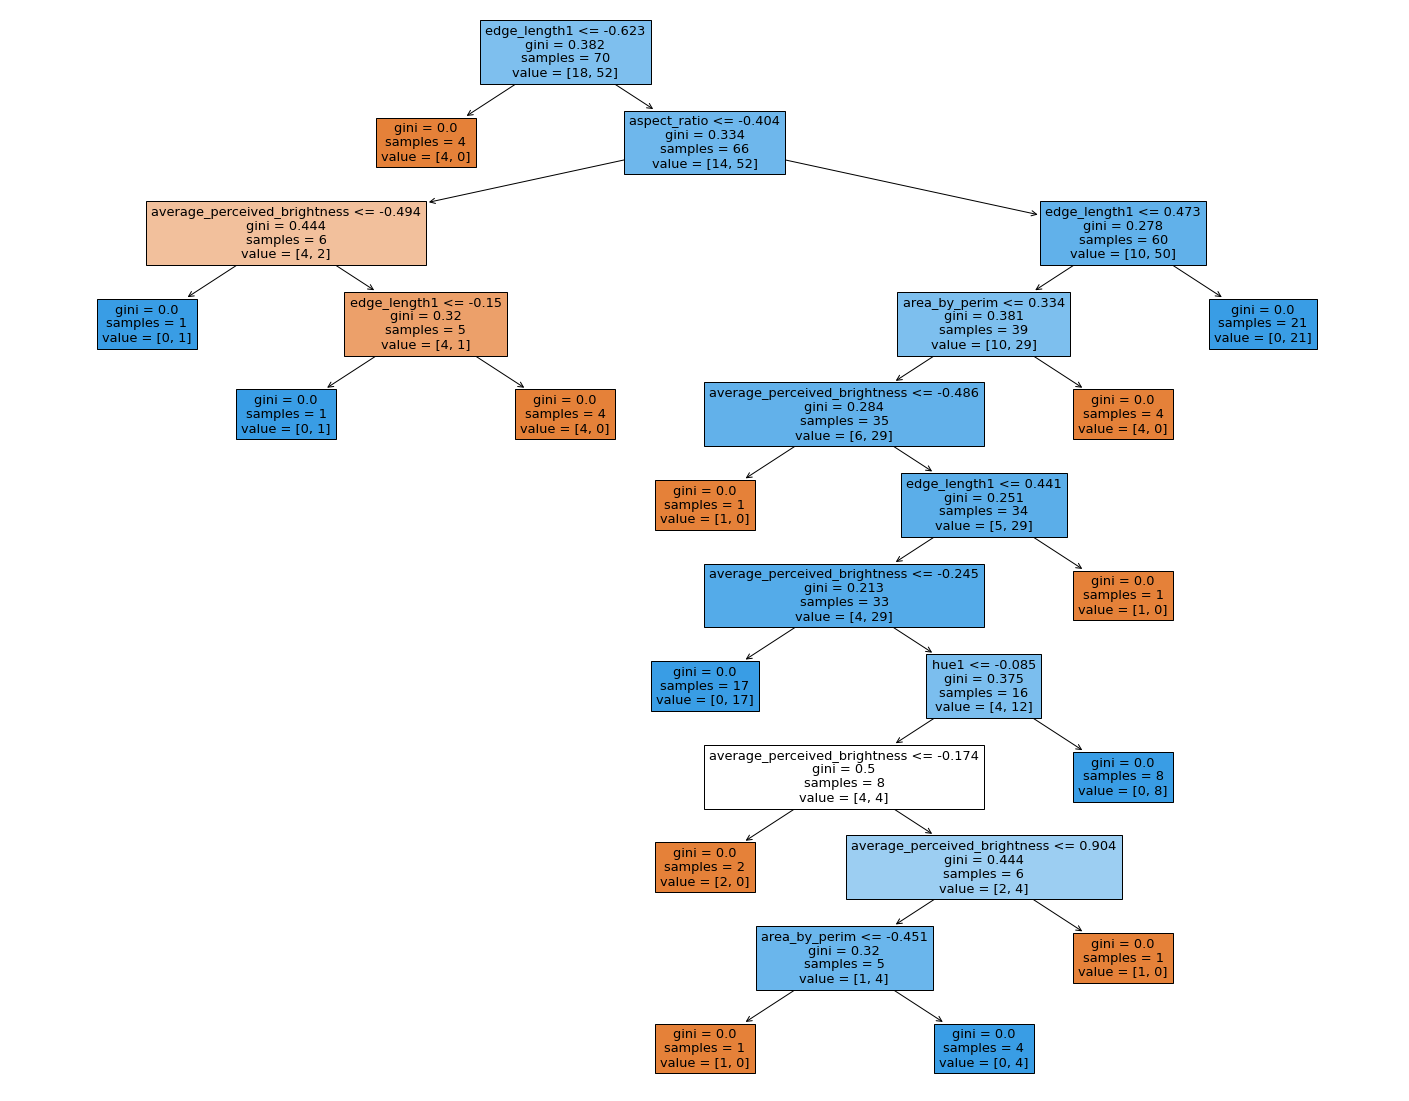

In [31]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(tree_model, 
                   feature_names=features[1:],  
                   filled=True)

[0.22100911 0.         0.24413763 0.10198135 0.35808558 0.07478632]


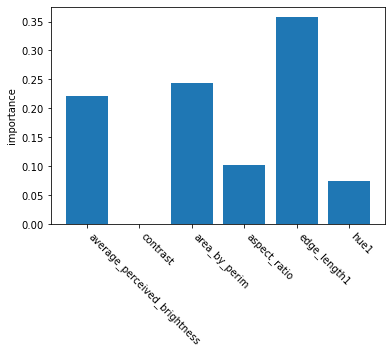

In [32]:
ypos = np.arange(len(features[1:]))

plt.xticks(ypos, features[1:])
plt.ylabel("importance")
plt.bar(ypos, tree_model.feature_importances_)
plt.xticks(rotation=-45, ha='left')
print(tree_model.feature_importances_)
plt.show()

In [33]:
dt_accs

{'kp_surf': 74.28571428571429,
 'average_perceived_brightness': 74.28571428571429,
 'contrast': 62.857142857142854,
 'area_by_perim': 77.14285714285715,
 'aspect_ratio': 71.42857142857143,
 'edge_length1': 80.0,
 'hue1': 71.42857142857143}

In [34]:
print('Testing accuracy of the Decision Tree:', tree_model.score(test, y_test)*100)

Testing accuracy of the Decision Tree: 80.0


In [35]:
y_test

,Mobilenet_v1
2848,1
1322,0
1766,1
519,1
2208,1
1419,0
1659,0
1053,1
2765,1
1921,1
